## Importing Dataset Cleaned by Matchms and Lookups

In [1]:
import os
import sys
from random import random
import gensim
import numpy as np
import pandas as pd
import custom_filtering
from matplotlib import pyplot as plt
from matchms import Scores, Spectrum
from matchms.importing import load_from_json



In [2]:
ROOT = os.path.dirname(os.getcwd())
#path_data = os.path.join(ROOT, 'data')
path_data = 'C:\\Users\\User\\Data'
sys.path.insert(0, ROOT)

from matchms.importing import load_from_json

filename = os.path.join(path_data,'gnps_positive_ionmode_cleaned_by_matchms_and_lookups.json')
spectrums = load_from_json(filename)

print("number of spectra:", len(spectrums))


number of spectra: 112956


## Plotting peaks per spectrum

Text(0, 0.5, 'number of spectra in respective bin')

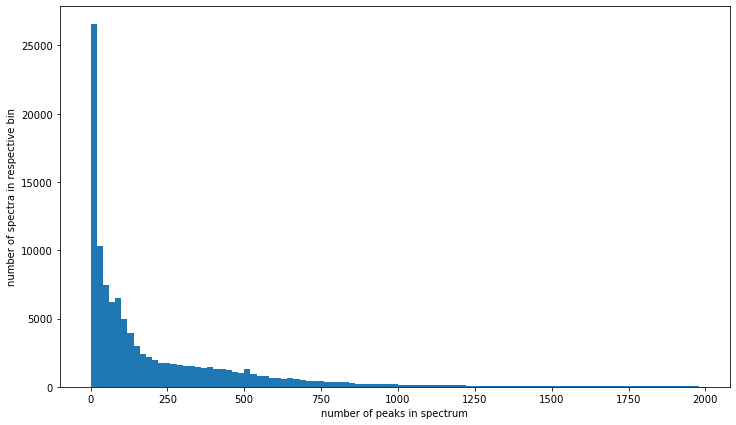

In [3]:
number_of_peaks = [len(spec.peaks) for spec in spectrums]


plt.figure(figsize=(12,7))
hist = plt.hist(number_of_peaks, np.arange(0,2000,20))
plt.xlabel("number of peaks in spectrum")
plt.ylabel("number of spectra in respective bin")

## Post-Process

Preparing data for cosine similarity scoring. Done by:

- normalize peaks (maximum intensity to 1)
- remove peaks outside [0, 1000] m/z window
- remove spectra with < 10 peaks
- remove peaks with intensities < 0.01 of maximum intensity.

In [4]:
from matchms.filtering import normalize_intensities
from matchms.filtering import require_minimum_number_of_peaks
from matchms.filtering import select_by_mz
from matchms.filtering import select_by_relative_intensity
from matchms.filtering import reduce_to_number_of_peaks
from matchms.filtering import add_losses
from matchms.filtering import reduce_to_number_of_peaks

def post_process(s):
    s = normalize_intensities(s)
    s = select_by_mz(s, mz_from=0, mz_to=1000)
    s = select_by_relative_intensity(s, intensity_from=0.01, intensity_to=1.0)
    s = reduce_to_number_of_peaks(s, 10, 150, None)
    return s

# apply filters to the data
spectrums = [post_process(s) for s in spectrums]

# omit spectrums that didn't qualify for analysis
spectrums = [s for s in spectrums if s is not None]


print("Remaining spectra after post process", len(spectrums))

spectrumswithpeak = []

from custom_filtering import get_parent_peak

for spec in spectrums:
    if(get_parent_peak(spec) != None):
        spectrumswithpeak.append(spec)
    
print(len(spectrumswithpeak))

    


Remaining spectra after post process 69110
12865


In [5]:
from custom_filtering import find_chem_string


spectrums_with_inchi = []

for spec in spectrumswithpeak:
    if(find_chem_string(spec) is not None):
        spectrums_with_inchi.append(spec)

print(len(spectrums_with_inchi))

print(find_chem_string(spectrums_with_inchi[0]))

print(find_chem_string(spectrums_with_inchi[1]))

print(find_chem_string(spectrums_with_inchi[2]))

print(find_chem_string(spectrums_with_inchi[3]))

print(find_chem_string(spectrums_with_inchi[4]))

print(find_chem_string(spectrums_with_inchi[4]))

print(find_chem_string(spectrums_with_inchi[11]))

11542
C41H55N5O7
C41H55N5O7
C43H79N7O9
C45H83N7O9
C45H83N7O9
C45H83N7O9
C21H20ClNO6


library is  1 and query is  0
library is  2 and query is  0
library is  3 and query is  0
library is  4 and query is  0
library is  5 and query is  0
library is  6 and query is  0
library is  7 and query is  0
library is  8 and query is  0
library is  9 and query is  0
library is  10 and query is  0
library is  11 and query is  0
library is  12 and query is  0
library is  13 and query is  0
library is  14 and query is  0
library is  15 and query is  0
library is  16 and query is  0
library is  16 and query is  1
library is  17 and query is  1
library is  18 and query is  1
library is  19 and query is  1
library is  20 and query is  1
library is  21 and query is  1
library is  22 and query is  1
library is  23 and query is  1
library is  24 and query is  1
library is  25 and query is  1
library is  26 and query is  1
library is  26 and query is  2
library is  27 and query is  2
library is  28 and query is  2
library is  28 and query is  3
library is  29 and query is  3
library is  29 an

library is  243 and query is  32
library is  244 and query is  32
library is  245 and query is  32
library is  246 and query is  32
library is  247 and query is  32
library is  248 and query is  32
library is  249 and query is  32
library is  250 and query is  32
library is  251 and query is  32
library is  252 and query is  32
library is  253 and query is  32
library is  254 and query is  32
library is  254 and query is  33
library is  255 and query is  33
library is  256 and query is  33
library is  257 and query is  33
library is  258 and query is  33
library is  259 and query is  33
library is  260 and query is  33
library is  261 and query is  33
library is  261 and query is  34
library is  261 and query is  35
library is  262 and query is  35
library is  263 and query is  35
library is  264 and query is  35
library is  265 and query is  35
library is  266 and query is  35
library is  267 and query is  35
library is  268 and query is  35
library is  269 and query is  35
library is

library is  476 and query is  63
library is  477 and query is  63
library is  478 and query is  63
library is  479 and query is  63
library is  480 and query is  63
library is  481 and query is  63
library is  482 and query is  63
library is  483 and query is  63
library is  484 and query is  63
library is  485 and query is  63
library is  486 and query is  63
library is  487 and query is  63
library is  488 and query is  63
library is  489 and query is  63
library is  490 and query is  63
library is  491 and query is  63
library is  492 and query is  63
library is  493 and query is  63
library is  494 and query is  63
library is  495 and query is  63
library is  496 and query is  63
library is  497 and query is  63
library is  498 and query is  63
library is  499 and query is  63
library is  500 and query is  63
library is  501 and query is  63
library is  502 and query is  63
library is  503 and query is  63
library is  504 and query is  63
library is  505 and query is  63
library is

library is  681 and query is  107
library is  682 and query is  107
library is  683 and query is  107
library is  684 and query is  107
library is  684 and query is  108
library is  685 and query is  108
library is  685 and query is  109
library is  686 and query is  109
library is  687 and query is  109
library is  687 and query is  110
library is  688 and query is  110
library is  689 and query is  110
library is  690 and query is  110
library is  691 and query is  110
library is  692 and query is  110
library is  693 and query is  110
library is  693 and query is  111
library is  694 and query is  111
library is  695 and query is  111
library is  696 and query is  111
library is  697 and query is  111
library is  698 and query is  111
library is  699 and query is  111
library is  700 and query is  111
library is  701 and query is  111
library is  702 and query is  111
library is  703 and query is  111
library is  704 and query is  111
library is  705 and query is  111
library is  70

library is  891 and query is  141
library is  892 and query is  141
library is  893 and query is  141
library is  894 and query is  141
library is  894 and query is  142
library is  895 and query is  142
library is  895 and query is  143
library is  896 and query is  143
library is  897 and query is  143
library is  898 and query is  143
library is  899 and query is  143
library is  899 and query is  144
library is  900 and query is  144
library is  901 and query is  144
library is  902 and query is  144
library is  903 and query is  144
library is  903 and query is  145
library is  904 and query is  145
library is  905 and query is  145
library is  906 and query is  145
library is  907 and query is  145
library is  907 and query is  146
library is  908 and query is  146
library is  909 and query is  146
library is  909 and query is  147
library is  910 and query is  147
library is  911 and query is  147
library is  912 and query is  147
library is  913 and query is  147
library is  91

library is  1105 and query is  181
library is  1106 and query is  181
library is  1106 and query is  182
library is  1107 and query is  182
library is  1108 and query is  182
library is  1109 and query is  182
library is  1110 and query is  182
library is  1111 and query is  182
library is  1112 and query is  182
library is  1113 and query is  182
library is  1114 and query is  182
library is  1115 and query is  182
library is  1116 and query is  182
library is  1116 and query is  183
library is  1117 and query is  183
library is  1118 and query is  183
library is  1119 and query is  183
library is  1120 and query is  183
library is  1121 and query is  183
library is  1122 and query is  183
library is  1123 and query is  183
library is  1124 and query is  183
library is  1125 and query is  183
library is  1126 and query is  183
library is  1127 and query is  183
library is  1128 and query is  183
library is  1129 and query is  183
library is  1130 and query is  183
library is  1131 and

library is  1335 and query is  205
library is  1335 and query is  206
library is  1336 and query is  206
library is  1337 and query is  206
library is  1337 and query is  207
library is  1337 and query is  208
library is  1338 and query is  208
library is  1338 and query is  209
library is  1339 and query is  209
library is  1340 and query is  209
library is  1340 and query is  210
library is  1340 and query is  211
library is  1341 and query is  211
library is  1342 and query is  211
library is  1343 and query is  211
library is  1343 and query is  212
library is  1344 and query is  212
library is  1345 and query is  212
library is  1346 and query is  212
library is  1347 and query is  212
library is  1348 and query is  212
library is  1349 and query is  212
library is  1350 and query is  212
library is  1351 and query is  212
library is  1352 and query is  212
library is  1353 and query is  212
library is  1353 and query is  213
library is  1354 and query is  213
library is  1354 and

library is  1497 and query is  285
library is  1497 and query is  286
library is  1498 and query is  286
library is  1498 and query is  287
library is  1499 and query is  287
library is  1500 and query is  287
library is  1501 and query is  287
library is  1502 and query is  287
library is  1503 and query is  287
library is  1504 and query is  287
library is  1505 and query is  287
library is  1506 and query is  287
library is  1507 and query is  287
library is  1508 and query is  287
library is  1509 and query is  287
library is  1510 and query is  287
library is  1511 and query is  287
library is  1512 and query is  287
library is  1513 and query is  287
library is  1514 and query is  287
library is  1515 and query is  287
library is  1516 and query is  287
library is  1517 and query is  287
library is  1517 and query is  288
library is  1518 and query is  288
library is  1519 and query is  288
library is  1520 and query is  288
library is  1521 and query is  288
library is  1522 and

library is  1683 and query is  339
library is  1684 and query is  339
library is  1685 and query is  339
library is  1685 and query is  340
library is  1685 and query is  341
library is  1686 and query is  341
library is  1687 and query is  341
library is  1688 and query is  341
library is  1689 and query is  341
library is  1689 and query is  342
library is  1689 and query is  343
library is  1690 and query is  343
library is  1690 and query is  344
library is  1690 and query is  345
library is  1691 and query is  345
library is  1692 and query is  345
library is  1693 and query is  345
library is  1694 and query is  345
library is  1694 and query is  346
library is  1694 and query is  347
library is  1694 and query is  348
library is  1694 and query is  349
library is  1695 and query is  349
library is  1696 and query is  349
library is  1696 and query is  350
library is  1697 and query is  350
library is  1698 and query is  350
library is  1699 and query is  350
library is  1700 and

library is  1867 and query is  392
library is  1868 and query is  392
library is  1869 and query is  392
library is  1869 and query is  393
library is  1869 and query is  394
library is  1870 and query is  394
library is  1871 and query is  394
library is  1872 and query is  394
library is  1873 and query is  394
library is  1874 and query is  394
library is  1875 and query is  394
library is  1876 and query is  394
library is  1877 and query is  394
library is  1878 and query is  394
library is  1879 and query is  394
library is  1880 and query is  394
library is  1881 and query is  394
library is  1882 and query is  394
library is  1882 and query is  395
library is  1883 and query is  395
library is  1884 and query is  395
library is  1885 and query is  395
library is  1885 and query is  396
library is  1885 and query is  397
library is  1886 and query is  397
library is  1887 and query is  397
library is  1888 and query is  397
library is  1888 and query is  398
library is  1889 and

library is  2062 and query is  435
library is  2063 and query is  435
library is  2064 and query is  435
library is  2065 and query is  435
library is  2066 and query is  435
library is  2066 and query is  436
library is  2066 and query is  437
library is  2067 and query is  437
library is  2068 and query is  437
library is  2068 and query is  438
library is  2069 and query is  438
library is  2070 and query is  438
library is  2070 and query is  439
library is  2071 and query is  439
library is  2072 and query is  439
library is  2073 and query is  439
library is  2074 and query is  439
library is  2075 and query is  439
library is  2076 and query is  439
library is  2077 and query is  439
library is  2078 and query is  439
library is  2079 and query is  439
library is  2080 and query is  439
library is  2081 and query is  439
library is  2082 and query is  439
library is  2083 and query is  439
library is  2084 and query is  439
library is  2084 and query is  440
library is  2085 and

library is  2262 and query is  471
library is  2262 and query is  472
library is  2263 and query is  472
library is  2264 and query is  472
library is  2265 and query is  472
library is  2266 and query is  472
library is  2267 and query is  472
library is  2268 and query is  472
library is  2269 and query is  472
library is  2269 and query is  473
library is  2270 and query is  473
library is  2270 and query is  474
library is  2271 and query is  474
library is  2272 and query is  474
library is  2273 and query is  474
library is  2274 and query is  474
library is  2275 and query is  474
library is  2276 and query is  474
library is  2277 and query is  474
library is  2277 and query is  475
library is  2277 and query is  476
library is  2278 and query is  476
library is  2279 and query is  476
library is  2280 and query is  476
library is  2281 and query is  476
library is  2282 and query is  476
library is  2283 and query is  476
library is  2284 and query is  476
library is  2285 and

library is  2460 and query is  521
library is  2461 and query is  521
library is  2462 and query is  521
library is  2463 and query is  521
library is  2464 and query is  521
library is  2465 and query is  521
library is  2465 and query is  522
library is  2466 and query is  522
library is  2467 and query is  522
library is  2468 and query is  522
library is  2469 and query is  522
library is  2469 and query is  523
library is  2470 and query is  523
library is  2471 and query is  523
library is  2472 and query is  523
library is  2473 and query is  523
library is  2474 and query is  523
library is  2475 and query is  523
library is  2476 and query is  523
library is  2477 and query is  523
library is  2478 and query is  523
library is  2479 and query is  523
library is  2480 and query is  523
library is  2481 and query is  523
library is  2482 and query is  523
library is  2483 and query is  523
library is  2484 and query is  523
library is  2485 and query is  523
library is  2486 and

library is  2647 and query is  570
library is  2647 and query is  571
library is  2648 and query is  571
library is  2648 and query is  572
library is  2649 and query is  572
library is  2650 and query is  572
library is  2650 and query is  573
library is  2651 and query is  573
library is  2651 and query is  574
library is  2652 and query is  574
library is  2653 and query is  574
library is  2654 and query is  574
library is  2655 and query is  574
library is  2655 and query is  575
library is  2656 and query is  575
library is  2657 and query is  575
library is  2657 and query is  576
library is  2657 and query is  577
library is  2657 and query is  578
library is  2657 and query is  579
library is  2657 and query is  580
library is  2657 and query is  581
library is  2657 and query is  582
library is  2657 and query is  583
library is  2658 and query is  583
library is  2658 and query is  584
library is  2659 and query is  584
library is  2659 and query is  585
library is  2659 and

library is  2795 and query is  665
library is  2796 and query is  665
library is  2797 and query is  665
library is  2798 and query is  665
library is  2799 and query is  665
library is  2800 and query is  665
library is  2800 and query is  666
library is  2801 and query is  666
library is  2802 and query is  666
library is  2802 and query is  667
library is  2802 and query is  668
library is  2803 and query is  668
library is  2804 and query is  668
library is  2805 and query is  668
library is  2806 and query is  668
library is  2807 and query is  668
library is  2808 and query is  668
library is  2809 and query is  668
library is  2810 and query is  668
library is  2810 and query is  669
library is  2810 and query is  670
library is  2811 and query is  670
library is  2812 and query is  670
library is  2813 and query is  670
library is  2814 and query is  670
library is  2815 and query is  670
library is  2816 and query is  670
library is  2817 and query is  670
library is  2818 and

library is  2974 and query is  723
library is  2975 and query is  723
library is  2975 and query is  724
library is  2976 and query is  724
library is  2977 and query is  724
library is  2978 and query is  724
library is  2979 and query is  724
library is  2980 and query is  724
library is  2981 and query is  724
library is  2982 and query is  724
library is  2983 and query is  724
library is  2984 and query is  724
library is  2985 and query is  724
library is  2986 and query is  724
library is  2987 and query is  724
library is  2988 and query is  724
library is  2989 and query is  724
library is  2990 and query is  724
library is  2991 and query is  724
library is  2992 and query is  724
library is  2993 and query is  724
library is  2994 and query is  724
library is  2995 and query is  724
library is  2995 and query is  725
library is  2996 and query is  725
library is  2997 and query is  725
library is  2998 and query is  725
library is  2999 and query is  725
library is  3000 and

library is  3000 and query is  931
library is  3000 and query is  932
library is  3000 and query is  933
library is  3000 and query is  934
library is  3000 and query is  935
library is  3000 and query is  936
library is  3000 and query is  937
library is  3000 and query is  938
library is  3000 and query is  939
library is  3000 and query is  940
library is  3000 and query is  941
library is  3000 and query is  942
library is  3000 and query is  943
library is  3000 and query is  944
library is  3000 and query is  945
library is  3000 and query is  946
library is  3000 and query is  947
library is  3000 and query is  948
library is  3000 and query is  949
library is  3000 and query is  950
library is  3000 and query is  951
library is  3000 and query is  952
library is  3000 and query is  953
library is  3000 and query is  954
library is  3000 and query is  955
library is  3000 and query is  956
library is  3000 and query is  957
library is  3000 and query is  958
library is  3000 and

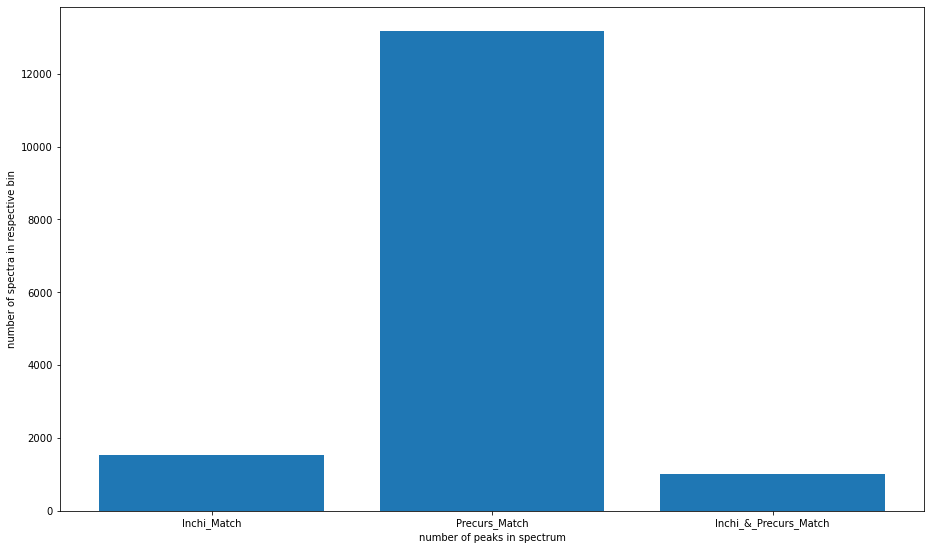

In [6]:
library_spectrums = []
query_spectrums = []

from custom_filtering import is_molecule_here

for spec in spectrums_with_inchi:
        if(len(library_spectrums) == 3000) & (len(query_spectrums) == 1000):
            break   
        if(is_molecule_here(spec, library_spectrums) == 0) & (len(library_spectrums) < 3000):
            library_spectrums.append(spec)
            print("library is ", len(library_spectrums), "and query is ", len(query_spectrums))
        else:
            if(is_molecule_here(spec,query_spectrums) == 0) & (is_molecule_here(spec, library_spectrums) == 1) & (len(query_spectrums) < 1000):
                query_spectrums.append(spec)
                print("library is ", len(library_spectrums), "and query is ", len(query_spectrums))

        
          
print(len(library_spectrums))
print(len(query_spectrums))


molecule_matches = 0
for spec in query_spectrums:
    if(is_molecule_here(spec, library_spectrums) == 1):
        molecule_matches += 1

print("Molecule matches =", molecule_matches)

from custom_analysis import look_for_inchi_and_precursor

look_for_inchi_and_precursor(query_spectrums, library_spectrums)
                

    
    

In [7]:
from custom_fragment import FragmentPeak

frag1 = FragmentPeak(spectrums[3].peaks.mz[1], spectrums[3].peaks.intensities[1], spectrums[3].get('spectrum_id'))
frag2 = FragmentPeak(spectrums[1].peaks.mz[1], spectrums[1].peaks.intensities[1], spectrums[1].get('spectrum_id'))
frag3 = FragmentPeak(spectrums[2].peaks.mz[1], spectrums[2].peaks.intensities[1], spectrums[2].get('spectrum_id'))
frag4 = FragmentPeak(spectrums[5].peaks.mz[1], spectrums[5].peaks.intensities[1], spectrums[5].get('spectrum_id'))
frag5 = FragmentPeak(spectrums[6].peaks.mz[1], spectrums[6].peaks.intensities[1], spectrums[6].get('spectrum_id'))

frag_list = [frag1, frag2, frag3, frag4, frag5]
frag_order = [f.mz for f in frag_list]

print(frag_order)

frag_list_sorted = sorted(frag_list)
frag_list_sorted_order = [f.mz for f in frag_list_sorted]

all_fragments_list = []

j = 0;

for spec in library_spectrums :
    i = 0;
    for p in spec.peaks.mz:
        frag = FragmentPeak(spec.peaks.mz[i], spec.peaks.intensities[i], spec.get('spectrum_id'))
        i += 1
        all_fragments_list.append(frag)  
    print("Full spectrum turned to ", i, " fragments ")
    print(len(all_fragments_list), " frags in list")
    print(j, " of ", len(library_spectrums), " spectrums turned to fragment objects.")
    j += 1


[103.028542, 503.328186, 490.31311, 101.115685, 370.177979]
Full spectrum turned to  64  fragments 
64  frags in list
0  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  41  fragments 
105  frags in list
1  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  61  fragments 
166  frags in list
2  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  87  fragments 
253  frags in list
3  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  42  fragments 
295  frags in list
4  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  57  fragments 
352  frags in list
5  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  23  fragments 
375  frags in list
6  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  64  fragments 
439  frags in list
7  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  33  fragments 
472  frags in list
8 

Full spectrum turned to  39  fragments 
4916  frags in list
114  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  12  fragments 
4928  frags in list
115  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  20  fragments 
4948  frags in list
116  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  25  fragments 
4973  frags in list
117  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  24  fragments 
4997  frags in list
118  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  19  fragments 
5016  frags in list
119  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  23  fragments 
5039  frags in list
120  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  31  fragments 
5070  frags in list
121  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  23  fragments 
5093  frags in list
122  of  3000  spectrums turned to f

Full spectrum turned to  75  fragments 
9598  frags in list
208  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  42  fragments 
9640  frags in list
209  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  150  fragments 
9790  frags in list
210  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  10  fragments 
9800  frags in list
211  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  18  fragments 
9818  frags in list
212  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  134  fragments 
9952  frags in list
213  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  77  fragments 
10029  frags in list
214  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  27  fragments 
10056  frags in list
215  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  150  fragments 
10206  frags in list
216  of  3000  spectrums turne

Full spectrum turned to  81  fragments 
15906  frags in list
306  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  56  fragments 
15962  frags in list
307  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  104  fragments 
16066  frags in list
308  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  100  fragments 
16166  frags in list
309  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  16  fragments 
16182  frags in list
310  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  85  fragments 
16267  frags in list
311  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  42  fragments 
16309  frags in list
312  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  90  fragments 
16399  frags in list
313  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  28  fragments 
16427  frags in list
314  of  3000  spectrums 

Full spectrum turned to  63  fragments 
21448  frags in list
420  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  16  fragments 
21464  frags in list
421  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  21  fragments 
21485  frags in list
422  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  17  fragments 
21502  frags in list
423  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  52  fragments 
21554  frags in list
424  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  136  fragments 
21690  frags in list
425  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  15  fragments 
21705  frags in list
426  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  18  fragments 
21723  frags in list
427  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  15  fragments 
21738  frags in list
428  of  3000  spectrums t

Full spectrum turned to  150  fragments 
27738  frags in list
508  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  16  fragments 
27754  frags in list
509  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  57  fragments 
27811  frags in list
510  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  35  fragments 
27846  frags in list
511  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  23  fragments 
27869  frags in list
512  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  12  fragments 
27881  frags in list
513  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  89  fragments 
27970  frags in list
514  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  15  fragments 
27985  frags in list
515  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  20  fragments 
28005  frags in list
516  of  3000  spectrums t

619  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  32  fragments 
32931  frags in list
620  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  22  fragments 
32953  frags in list
621  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  33  fragments 
32986  frags in list
622  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  15  fragments 
33001  frags in list
623  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  47  fragments 
33048  frags in list
624  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  57  fragments 
33105  frags in list
625  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  53  fragments 
33158  frags in list
626  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  14  fragments 
33172  frags in list
627  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  12  fragme

Full spectrum turned to  47  fragments 
38971  frags in list
718  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  29  fragments 
39000  frags in list
719  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  22  fragments 
39022  frags in list
720  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  19  fragments 
39041  frags in list
721  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  26  fragments 
39067  frags in list
722  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  14  fragments 
39081  frags in list
723  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  10  fragments 
39091  frags in list
724  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  16  fragments 
39107  frags in list
725  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  10  fragments 
39117  frags in list
726  of  3000  spectrums tu

44433  frags in list
830  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  66  fragments 
44499  frags in list
831  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  113  fragments 
44612  frags in list
832  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  150  fragments 
44762  frags in list
833  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  150  fragments 
44912  frags in list
834  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  105  fragments 
45017  frags in list
835  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  84  fragments 
45101  frags in list
836  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  100  fragments 
45201  frags in list
837  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  25  fragments 
45226  frags in list
838  of  3000  spectrums turned to fragment objects.
Full spec

Full spectrum turned to  60  fragments 
49708  frags in list
968  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  88  fragments 
49796  frags in list
969  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  21  fragments 
49817  frags in list
970  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  85  fragments 
49902  frags in list
971  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  26  fragments 
49928  frags in list
972  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  41  fragments 
49969  frags in list
973  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  13  fragments 
49982  frags in list
974  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  17  fragments 
49999  frags in list
975  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  28  fragments 
50027  frags in list
976  of  3000  spectrums tu

Full spectrum turned to  99  fragments 
55103  frags in list
1083  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  12  fragments 
55115  frags in list
1084  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  53  fragments 
55168  frags in list
1085  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  99  fragments 
55267  frags in list
1086  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  17  fragments 
55284  frags in list
1087  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  15  fragments 
55299  frags in list
1088  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  16  fragments 
55315  frags in list
1089  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  150  fragments 
55465  frags in list
1090  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  34  fragments 
55499  frags in list
1091  of  3000  sp

Full spectrum turned to  10  fragments 
60484  frags in list
1209  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  42  fragments 
60526  frags in list
1210  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  30  fragments 
60556  frags in list
1211  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  14  fragments 
60570  frags in list
1212  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  11  fragments 
60581  frags in list
1213  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  14  fragments 
60595  frags in list
1214  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  12  fragments 
60607  frags in list
1215  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  150  fragments 
60757  frags in list
1216  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  15  fragments 
60772  frags in list
1217  of  3000  sp

Full spectrum turned to  150  fragments 
66545  frags in list
1320  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  150  fragments 
66695  frags in list
1321  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  106  fragments 
66801  frags in list
1322  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  96  fragments 
66897  frags in list
1323  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  22  fragments 
66919  frags in list
1324  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  54  fragments 
66973  frags in list
1325  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  24  fragments 
66997  frags in list
1326  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  61  fragments 
67058  frags in list
1327  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  53  fragments 
67111  frags in list
1328  of  3000  

Full spectrum turned to  150  fragments 
71932  frags in list
1442  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  42  fragments 
71974  frags in list
1443  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  11  fragments 
71985  frags in list
1444  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  150  fragments 
72135  frags in list
1445  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  28  fragments 
72163  frags in list
1446  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  13  fragments 
72176  frags in list
1447  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  30  fragments 
72206  frags in list
1448  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  16  fragments 
72222  frags in list
1449  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  50  fragments 
72272  frags in list
1450  of  3000  s

Full spectrum turned to  150  fragments 
77840  frags in list
1548  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  45  fragments 
77885  frags in list
1549  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  150  fragments 
78035  frags in list
1550  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  50  fragments 
78085  frags in list
1551  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  37  fragments 
78122  frags in list
1552  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  47  fragments 
78169  frags in list
1553  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  13  fragments 
78182  frags in list
1554  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  24  fragments 
78206  frags in list
1555  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  42  fragments 
78248  frags in list
1556  of  3000  s

Full spectrum turned to  39  fragments 
84546  frags in list
1644  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  16  fragments 
84562  frags in list
1645  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  84  fragments 
84646  frags in list
1646  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  76  fragments 
84722  frags in list
1647  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  14  fragments 
84736  frags in list
1648  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  150  fragments 
84886  frags in list
1649  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  44  fragments 
84930  frags in list
1650  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  26  fragments 
84956  frags in list
1651  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  27  fragments 
84983  frags in list
1652  of  3000  sp

Full spectrum turned to  150  fragments 
91676  frags in list
1738  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  122  fragments 
91798  frags in list
1739  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  40  fragments 
91838  frags in list
1740  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  40  fragments 
91878  frags in list
1741  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  21  fragments 
91899  frags in list
1742  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  12  fragments 
91911  frags in list
1743  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  64  fragments 
91975  frags in list
1744  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  83  fragments 
92058  frags in list
1745  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  37  fragments 
92095  frags in list
1746  of  3000  s

Full spectrum turned to  57  fragments 
97783  frags in list
1838  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  123  fragments 
97906  frags in list
1839  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  100  fragments 
98006  frags in list
1840  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  10  fragments 
98016  frags in list
1841  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  12  fragments 
98028  frags in list
1842  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  12  fragments 
98040  frags in list
1843  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  83  fragments 
98123  frags in list
1844  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  11  fragments 
98134  frags in list
1845  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  29  fragments 
98163  frags in list
1846  of  3000  s

Full spectrum turned to  51  fragments 
102618  frags in list
1913  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  59  fragments 
102677  frags in list
1914  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  33  fragments 
102710  frags in list
1915  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  64  fragments 
102774  frags in list
1916  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  63  fragments 
102837  frags in list
1917  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  46  fragments 
102883  frags in list
1918  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  132  fragments 
103015  frags in list
1919  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  104  fragments 
103119  frags in list
1920  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  37  fragments 
103156  frags in list
1921  of

Full spectrum turned to  30  fragments 
108353  frags in list
2003  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  43  fragments 
108396  frags in list
2004  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  87  fragments 
108483  frags in list
2005  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  36  fragments 
108519  frags in list
2006  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  134  fragments 
108653  frags in list
2007  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  83  fragments 
108736  frags in list
2008  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  150  fragments 
108886  frags in list
2009  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  29  fragments 
108915  frags in list
2010  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  84  fragments 
108999  frags in list
2011  of

2111  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  63  fragments 
114527  frags in list
2112  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  12  fragments 
114539  frags in list
2113  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  30  fragments 
114569  frags in list
2114  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  150  fragments 
114719  frags in list
2115  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  150  fragments 
114869  frags in list
2116  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  150  fragments 
115019  frags in list
2117  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  67  fragments 
115086  frags in list
2118  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  29  fragments 
115115  frags in list
2119  of  3000  spectrums turned to fragment objects.
Full spectrum t

Full spectrum turned to  27  fragments 
120760  frags in list
2208  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  150  fragments 
120910  frags in list
2209  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  59  fragments 
120969  frags in list
2210  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  13  fragments 
120982  frags in list
2211  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  46  fragments 
121028  frags in list
2212  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  19  fragments 
121047  frags in list
2213  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  46  fragments 
121093  frags in list
2214  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  17  fragments 
121110  frags in list
2215  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  74  fragments 
121184  frags in list
2216  of 

Full spectrum turned to  57  fragments 
127148  frags in list
2298  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  15  fragments 
127163  frags in list
2299  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  150  fragments 
127313  frags in list
2300  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  51  fragments 
127364  frags in list
2301  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  11  fragments 
127375  frags in list
2302  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  33  fragments 
127408  frags in list
2303  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  12  fragments 
127420  frags in list
2304  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  21  fragments 
127441  frags in list
2305  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  52  fragments 
127493  frags in list
2306  of 

Full spectrum turned to  150  fragments 
133562  frags in list
2398  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  12  fragments 
133574  frags in list
2399  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  20  fragments 
133594  frags in list
2400  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  26  fragments 
133620  frags in list
2401  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  17  fragments 
133637  frags in list
2402  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  150  fragments 
133787  frags in list
2403  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  70  fragments 
133857  frags in list
2404  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  11  fragments 
133868  frags in list
2405  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  13  fragments 
133881  frags in list
2406  of

Full spectrum turned to  18  fragments 
139879  frags in list
2490  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  37  fragments 
139916  frags in list
2491  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  47  fragments 
139963  frags in list
2492  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  83  fragments 
140046  frags in list
2493  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  115  fragments 
140161  frags in list
2494  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  111  fragments 
140272  frags in list
2495  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  46  fragments 
140318  frags in list
2496  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  150  fragments 
140468  frags in list
2497  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  67  fragments 
140535  frags in list
2498  o

Full spectrum turned to  150  fragments 
146452  frags in list
2583  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  88  fragments 
146540  frags in list
2584  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  150  fragments 
146690  frags in list
2585  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  22  fragments 
146712  frags in list
2586  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  143  fragments 
146855  frags in list
2587  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  144  fragments 
146999  frags in list
2588  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  150  fragments 
147149  frags in list
2589  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  67  fragments 
147216  frags in list
2590  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  19  fragments 
147235  frags in list
2591 

2669  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  103  fragments 
152719  frags in list
2670  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  26  fragments 
152745  frags in list
2671  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  20  fragments 
152765  frags in list
2672  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  23  fragments 
152788  frags in list
2673  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  92  fragments 
152880  frags in list
2674  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  59  fragments 
152939  frags in list
2675  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  86  fragments 
153025  frags in list
2676  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  11  fragments 
153036  frags in list
2677  of  3000  spectrums turned to fragment objects.
Full spectrum tur

Full spectrum turned to  45  fragments 
157431  frags in list
2789  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  29  fragments 
157460  frags in list
2790  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  19  fragments 
157479  frags in list
2791  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  12  fragments 
157491  frags in list
2792  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  24  fragments 
157515  frags in list
2793  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  13  fragments 
157528  frags in list
2794  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  12  fragments 
157540  frags in list
2795  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  150  fragments 
157690  frags in list
2796  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  14  fragments 
157704  frags in list
2797  of 

Full spectrum turned to  150  fragments 
163201  frags in list
2906  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  33  fragments 
163234  frags in list
2907  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  54  fragments 
163288  frags in list
2908  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  69  fragments 
163357  frags in list
2909  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  61  fragments 
163418  frags in list
2910  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  101  fragments 
163519  frags in list
2911  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  13  fragments 
163532  frags in list
2912  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  150  fragments 
163682  frags in list
2913  of  3000  spectrums turned to fragment objects.
Full spectrum turned to  150  fragments 
163832  frags in list
2914  

Unsorted fragments lists:
Peak with mz:  100.112137 , intensity:  0.24160576740361375 , from spectrum:  CCMSLIB00000001563
Peak with mz:  101.115273 , intensity:  0.018976492044985672 , from spectrum:  CCMSLIB00000001563
Peak with mz:  116.070168 , intensity:  0.049891982984332 , from spectrum:  CCMSLIB00000001563
Peak with mz:  120.080475 , intensity:  0.10160589407343291 , from spectrum:  CCMSLIB00000001563
Peak with mz:  121.083824 , intensity:  0.010495530163056288 , from spectrum:  CCMSLIB00000001563
Peak with mz:  123.067177 , intensity:  0.013143706307198612 , from spectrum:  CCMSLIB00000001563
Peak with mz:  126.054535 , intensity:  0.03257145164370906 , from spectrum:  CCMSLIB00000001563
Peak with mz:  151.061996 , intensity:  0.019383904188939427 , from spectrum:  CCMSLIB00000001563
Peak with mz:  152.069885 , intensity:  0.021584785236239894 , from spectrum:  CCMSLIB00000001563
Peak with mz:  166.121994 , intensity:  0.09793792795508237 , from spectrum:  CCMSLIB00000001563
P

Text(0, 0.5, 'number of spectra in respective bin')

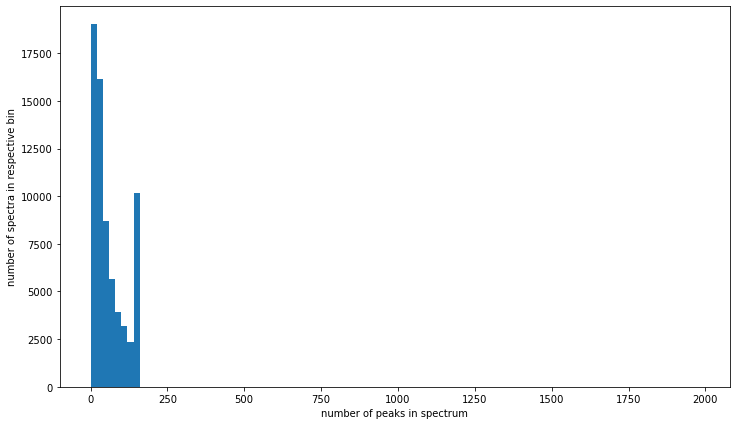

In [8]:
print("Unsorted fragments lists:")

for i in range(20):
    all_fragments_list[i].print_fragment()
    
all_fragments_list_sorted = sorted(all_fragments_list)

print("Sorted by MZs: ")

for i in range(20):
    all_fragments_list_sorted[i].print_fragment()
    
number_of_peaks = [len(spec.peaks) for spec in spectrums]

print(spectrums[1].peaks.intensities)
print(spectrums[2].peaks.intensities)

plt.figure(figsize=(12,7))
hist = plt.hist(number_of_peaks, np.arange(0,2000,20))
plt.xlabel("number of peaks in spectrum")
plt.ylabel("number of spectra in respective bin")



In [9]:
from decoy_helpers import ispeakhere, masswithin5ppm
import random

def create_naive_decoy(s):
    print(get_parent_peak(s))
    decoy_mz = np.array([get_parent_peak(s)[0]])
    decoy_intensity = np.array([get_parent_peak(s)[1]])                        
    peaks_in_target = len(s.peaks.mz)

    random_spectrums = random.sample(library_spectrums, peaks_in_target - 1)

    for spec in random_spectrums:
        randommass =  random.choice(spec.peaks.mz)
        index = np.where(spec.peaks.mz == randommass)
        randomintensity = spec.peaks.intensities[index]
        decoy_mz = np.append(decoy_mz, [randommass])
        decoy_intensity = np.append(decoy_intensity, [randomintensity])
        


    decoy_mz = np.asarray(decoy_mz, dtype=float) 
    decoy_intensity = np.asarray(decoy_intensity, dtype=float) 

    inds  = decoy_mz.argsort()

    sorted_intensities = decoy_intensity[inds]
    sorted_mzs = decoy_mz[inds]

    decoy = Spectrum(sorted_mzs, sorted_intensities)
    
    return decoy
       

In [10]:
i = 1

naive_decoy_spectrums = []

for spec in library_spectrums:
    s = create_naive_decoy(spec)
    naive_decoy_spectrums.append(s)
    print(i, " naive decoy created")
    i += 1


print( "Total processed peaks = ", len(naive_decoy_spectrums))

(730.41748, 0.32221459074966236)
1  naive decoy created
(752.399353, 1.0)
2  naive decoy created
(860.5802, 0.9647228520807143)
3  naive decoy created
(866.630493, 0.7775384044896534)
4  naive decoy created
(888.613281, 1.0)
5  naive decoy created
(513.307617, 0.057068288462424836)
6  naive decoy created
(535.289246, 1.0)
7  naive decoy created
(515.321838, 0.3340167902452269)
8  naive decoy created
(850.635437, 0.2467053597061022)
9  naive decoy created
(348.154022, 0.10021788380630128)
10  naive decoy created
(610.416504, 0.45563193731569374)
11  naive decoy created
(440.08667, 1.0)
12  naive decoy created
(727.320129, 1.0)
13  naive decoy created
(601.357117, 1.0)
14  naive decoy created
(410.282379, 0.23797567036414907)
15  naive decoy created
(432.264069, 1.0)
16  naive decoy created
(879.461914, 1.0)
17  naive decoy created
(418.256348, 1.0)
18  naive decoy created
(445.111084, 0.011281019655745557)
19  naive decoy created
(467.093933, 1.0)
20  naive decoy created
(809.311462, 1.

163  naive decoy created
(414.154144, 0.09969383315303952)
164  naive decoy created
(241.049683, 0.6657559198542805)
165  naive decoy created
(209.128754, 0.830764920145699)
166  naive decoy created
(325.190338, 1.0)
167  naive decoy created
(355.201172, 0.6585246028199724)
168  naive decoy created
(481.304504, 1.0)
169  naive decoy created
(298.217468, 1.0)
170  naive decoy created
(327.237579, 1.0)
171  naive decoy created
(840.497009, 1.0)
172  naive decoy created
(457.055481, 0.05609573672400898)
173  naive decoy created
(511.123199, 1.0)
174  naive decoy created
(543.091064, 1.0)
175  naive decoy created
(521.109009, 0.7703186875353574)
176  naive decoy created
(537.106445, 0.07449926722032242)
177  naive decoy created
(428.329132, 1.0)
178  naive decoy created
(267.016418, 0.5612149650596635)
179  naive decoy created
(802.513306, 0.01602645637242432)
180  naive decoy created
(828.52832, 1.0)
181  naive decoy created
(844.523987, 1.0)
182  naive decoy created
(872.523132, 1.0)
183

328  naive decoy created
(535.25177, 1.0)
329  naive decoy created
(403.283478, 0.5223111860280002)
330  naive decoy created
(445.294678, 0.12695590327169273)
331  naive decoy created
(430.296265, 0.6205300395730903)
332  naive decoy created
(452.276611, 1.0)
333  naive decoy created
(573.136536, 1.0)
334  naive decoy created
(591.149292, 1.0)
335  naive decoy created
(326.211121, 0.2489397099140052)
336  naive decoy created
(508.275421, 0.7597337420830675)
337  naive decoy created
(503.301392, 0.05680731940461559)
338  naive decoy created
(825.019165, 1.0)
339  naive decoy created
(681.305603, 0.046926470085372665)
340  naive decoy created
(593.323181, 0.02321941038351161)
341  naive decoy created
(567.295105, 1.0)
342  naive decoy created
(854.160461, 0.05157196423420825)
343  naive decoy created
(852.143494, 0.06098546682092651)
344  naive decoy created
(898.165894, 0.05048867994556477)
345  naive decoy created
(872.147827, 0.0483351070753164)
346  naive decoy created
(810.135193, 0

496  naive decoy created
(360.325134, 0.3755921523060422)
497  naive decoy created
(838.412231, 0.689768567351244)
498  naive decoy created
(826.50592, 0.5145736119564482)
499  naive decoy created
(860.490723, 0.6265929852261193)
500  naive decoy created
(595.34906, 0.5039815829478324)
501  naive decoy created
(369.237488, 0.11003339264943235)
502  naive decoy created
(341.206787, 0.1460054417219645)
503  naive decoy created
(265.117859, 0.01808601208316915)
504  naive decoy created
(278.191162, 0.7620075662859835)
505  naive decoy created
(319.154846, 0.7939356259036279)
506  naive decoy created
(329.064545, 1.0)
507  naive decoy created
(307.197662, 0.01530735306951589)
508  naive decoy created
(189.087372, 0.2508706099837626)
509  naive decoy created
(166.085175, 0.31695821626030996)
510  naive decoy created
(496.2612, 0.022921092699967647)
511  naive decoy created
(367.183838, 0.032542166799333395)
512  naive decoy created
(197.11731, 0.5650697849867974)
513  naive decoy created
(1

656  naive decoy created
(133.101166, 1.0)
657  naive decoy created
(438.309296, 0.046654170613641716)
658  naive decoy created
(410.316742, 1.0)
659  naive decoy created
(424.33255, 1.0)
660  naive decoy created
(452.325531, 0.12494298663019994)
661  naive decoy created
(424.294556, 0.13666099238481524)
662  naive decoy created
(396.301727, 1.0)
663  naive decoy created
(225.163361, 0.47926997721959025)
664  naive decoy created
(688.315125, 0.09783041573597909)
665  naive decoy created
(844.292419, 1.0)
666  naive decoy created
(373.273468, 0.023301236307019333)
667  naive decoy created
(839.563354, 0.022726080590362546)
668  naive decoy created
(355.261536, 1.0)
669  naive decoy created
(431.276154, 1.0)
670  naive decoy created
(817.579834, 0.01721492887796137)
671  naive decoy created
(263.183472, 0.644122383252818)
672  naive decoy created
(407.218567, 1.0)
673  naive decoy created
(486.165924, 0.8104584527220631)
674  naive decoy created
(383.342499, 0.221810461097646)
675  naive

809  naive decoy created
(609.297729, 0.0866774981596185)
810  naive decoy created
(549.236938, 0.22074002003615711)
811  naive decoy created
(175.087433, 0.22055872623505035)
812  naive decoy created
(988.524475, 0.5764378875347445)
813  naive decoy created
(985.47113, 1.0)
814  naive decoy created
(945.477783, 0.16196464076522113)
815  naive decoy created
(309.165985, 0.7071071735227539)
816  naive decoy created
(407.240143, 0.19504531570777628)
817  naive decoy created
(424.077148, 0.18001155260686513)
818  naive decoy created
(426.09256, 0.6152070328197072)
819  naive decoy created
(399.240784, 1.0)
820  naive decoy created
(530.956116, 0.21651020946022265)
821  naive decoy created
(482.980255, 0.04728980265937007)
822  naive decoy created
(460.969574, 0.16745635128071093)
823  naive decoy created
(551.260132, 0.8233934516429277)
824  naive decoy created
(310.028992, 0.08489198088779887)
825  naive decoy created
(389.937744, 0.239649010508348)
826  naive decoy created
(397.224243, 

(262.062775, 0.5188067444876784)
1005  naive decoy created
(421.120453, 0.48923076923076925)
1006  naive decoy created
(651.352173, 0.5055424809850267)
1007  naive decoy created
(629.368652, 0.09168003667201467)
1008  naive decoy created
(348.145233, 1.0)
1009  naive decoy created
(368.105377, 1.0)
1010  naive decoy created
(253.097855, 0.5512697652132247)
1011  naive decoy created
(390.215698, 1.0)
1012  naive decoy created
(453.276703, 0.6565863992045308)
1013  naive decoy created
(296.144012, 1.0)
1014  naive decoy created
(459.110321, 1.0)
1015  naive decoy created
(362.088715, 1.0)
1016  naive decoy created
(413.121796, 1.0)
1017  naive decoy created
(705.399414, 1.0)
1018  naive decoy created
(353.20224, 0.20048221820373718)
1019  naive decoy created
(727.378357, 1.0)
1020  naive decoy created
(201.595703, 1.0)
1021  naive decoy created
(533.227905, 0.6582715655800856)
1022  naive decoy created
(478.185303, 1.0)
1023  naive decoy created
(255.108719, 1.0)
1024  naive decoy create

1181  naive decoy created
(832.355774, 0.018539374512691675)
1182  naive decoy created
(854.335327, 0.9746535991889151)
1183  naive decoy created
(545.237732, 0.4325753569539926)
1184  naive decoy created
(281.114105, 1.0)
1185  naive decoy created
(240.115417, 0.3891229275524779)
1186  naive decoy created
(425.187439, 1.0)
1187  naive decoy created
(164.072327, 0.39545821015855953)
1188  naive decoy created
(327.136444, 1.0)
1189  naive decoy created
(426.167786, 1.0)
1190  naive decoy created
(370.137024, 1.0)
1191  naive decoy created
(453.206207, 0.7284894837476099)
1192  naive decoy created
(353.128357, 1.0)
1193  naive decoy created
(705.248779, 1.0)
1194  naive decoy created
(611.284851, 0.342267222553107)
1195  naive decoy created
(445.207703, 1.0)
1196  naive decoy created
(318.206116, 0.3078058379796655)
1197  naive decoy created
(361.137878, 0.011088043785977164)
1198  naive decoy created
(313.149109, 1.0)
1199  naive decoy created
(229.097366, 0.4667700942255481)
1200  naiv

1384  naive decoy created
(160.044632, 0.8380002731867231)
1385  naive decoy created
(263.082947, 1.0)
1386  naive decoy created
(296.143463, 1.0)
1387  naive decoy created
(469.231995, 0.5012336975678534)
1388  naive decoy created
(349.177521, 1.0)
1389  naive decoy created
(316.033569, 0.22169292781238548)
1390  naive decoy created
(302.198975, 1.0)
1391  naive decoy created
(429.240265, 1.0)
1392  naive decoy created
(279.146301, 1.0)
1393  naive decoy created
(389.164459, 0.29444406384873606)
1394  naive decoy created
(230.9991, 1.0)
1395  naive decoy created
(328.122345, 1.0)
1396  naive decoy created
(164.564941, 0.8908167583580194)
1397  naive decoy created
(319.161407, 1.0)
1398  naive decoy created
(201.160797, 0.8191796287004516)
1399  naive decoy created
(230.055939, 1.0)
1400  naive decoy created
(388.199646, 1.0)
1401  naive decoy created
(233.599411, 1.0)
1402  naive decoy created
(360.194366, 0.8164580963215775)
1403  naive decoy created
(396.290253, 1.0)
1404  naive dec

1541  naive decoy created
(395.196564, 1.0)
1542  naive decoy created
(455.137512, 0.5728681631802071)
1543  naive decoy created
(499.195343, 1.0)
1544  naive decoy created
(283.09726, 0.4508191653786708)
1545  naive decoy created
(479.270264, 0.012972534711665146)
1546  naive decoy created
(469.151947, 0.4482859482859483)
1547  naive decoy created
(528.297974, 1.0)
1548  naive decoy created
(353.064972, 0.7476106194690265)
1549  naive decoy created
(407.160004, 1.0)
1550  naive decoy created
(456.119781, 0.031506849315068496)
1551  naive decoy created
(388.064545, 0.03253314224292368)
1552  naive decoy created
(393.144257, 0.7896318114874816)
1553  naive decoy created
(468.296143, 1.0)
1554  naive decoy created
(445.175232, 0.017813822955810302)
1555  naive decoy created
(493.315857, 0.021344)
1556  naive decoy created
(409.223145, 0.010928586157124201)
1557  naive decoy created
(270.14859, 0.037057040837759174)
1558  naive decoy created
(281.127838, 0.11046990931574609)
1559  naive d

(275.055664, 0.889974293059126)
1697  naive decoy created
(185.107391, 0.5020428174538323)
1698  naive decoy created
(274.108398, 0.12794711129991504)
1699  naive decoy created
(303.182617, 0.1428454519415688)
1700  naive decoy created
(426.203491, 0.07181215510536647)
1701  naive decoy created
(372.180908, 0.5544005544005544)
1702  naive decoy created
(354.181366, 0.049519708512752565)
1703  naive decoy created
(408.181671, 0.3354689203925845)
1704  naive decoy created
(326.213348, 0.026022887599937296)
1705  naive decoy created
(580.257446, 0.10666528811690101)
1706  naive decoy created
(243.064987, 0.05632606849702802)
1707  naive decoy created
(261.002502, 0.36372939169982943)
1708  naive decoy created
(445.235687, 0.267932569732486)
1709  naive decoy created
(459.251862, 0.31475454298887984)
1710  naive decoy created
(564.261719, 0.10960623333159022)
1711  naive decoy created
(480.216187, 0.01967028849756463)
1712  naive decoy created
(367.203247, 0.1092375366568915)
1713  naive d

1867  naive decoy created
(535.145691, 0.3286339533709284)
1868  naive decoy created
(163.038773, 0.927393914724738)
1869  naive decoy created
(323.126984, 0.3194056364612054)
1870  naive decoy created
(340.154419, 1.0)
1871  naive decoy created
(295.154236, 0.061769164140320486)
1872  naive decoy created
(317.136932, 1.0)
1873  naive decoy created
(417.118408, 0.5576662314974237)
1874  naive decoy created
(450.285858, 0.07650809220205983)
1875  naive decoy created
(801.345032, 1.0)
1876  naive decoy created
(603.133301, 1.0)
1877  naive decoy created
(237.185974, 1.0)
1878  naive decoy created
(391.153442, 0.5845066485644691)
1879  naive decoy created
(437.197296, 0.1602937636364331)
1880  naive decoy created
(487.34024, 0.07410024439049333)
1881  naive decoy created
(469.331757, 1.0)
1882  naive decoy created
(365.232056, 0.2243564392579658)
1883  naive decoy created
(570.362732, 0.17406749555950266)
1884  naive decoy created
(396.252625, 0.8415264259822793)
1885  naive decoy created

2033  naive decoy created
(557.126038, 1.0)
2034  naive decoy created
(729.19989, 1.0)
2035  naive decoy created
(777.222778, 1.0)
2036  naive decoy created
(319.081573, 0.01157315889731517)
2037  naive decoy created
(205.122223, 0.034562284775534705)
2038  naive decoy created
(583.34491, 1.0)
2039  naive decoy created
(250.125244, 1.0)
2040  naive decoy created
(342.205475, 0.9260249442821178)
2041  naive decoy created
(563.175293, 0.035258381889387715)
2042  naive decoy created
(585.156433, 1.0)
2043  naive decoy created
(509.126404, 1.0)
2044  naive decoy created
(273.123322, 0.19942445391099428)
2045  naive decoy created
(343.188904, 1.0)
2046  naive decoy created
(353.195618, 0.039738092478850386)
2047  naive decoy created
(329.14856, 1.0)
2048  naive decoy created
(411.127747, 0.2423080042557049)
2049  naive decoy created
(369.095215, 0.14288702928870292)
2050  naive decoy created
(545.218079, 1.0)
2051  naive decoy created
(803.40387, 1.0)
2052  naive decoy created
(339.15921, 1

2210  naive decoy created
(346.163971, 1.0)
2211  naive decoy created
(449.143738, 1.0)
2212  naive decoy created
(440.133942, 1.0)
2213  naive decoy created
(651.20752, 1.0)
2214  naive decoy created
(489.13739, 1.0)
2215  naive decoy created
(833.431091, 1.0)
2216  naive decoy created
(516.26123, 0.2720200038180003)
2217  naive decoy created
(509.17926, 1.0)
2218  naive decoy created
(276.098846, 0.042312607631232936)
2219  naive decoy created
(324.146393, 0.2770298608582635)
2220  naive decoy created
(372.144806, 0.7431331713525396)
2221  naive decoy created
(354.133972, 1.0)
2222  naive decoy created
(981.282654, 0.5582417926329296)
2223  naive decoy created
(327.207245, 1.0)
2224  naive decoy created
(249.149384, 0.4020003013636706)
2225  naive decoy created
(249.109818, 1.0)
2226  naive decoy created
(428.244995, 1.0)
2227  naive decoy created
(655.272827, 0.6676401056876652)
2228  naive decoy created
(375.178284, 1.0)
2229  naive decoy created
(853.297791, 1.0)
2230  naive decoy

2374  naive decoy created
(443.1716, 0.4962643466293101)
2375  naive decoy created
(308.150085, 0.03749783998617591)
2376  naive decoy created
(965.50885, 1.0)
2377  naive decoy created
(563.176453, 0.017375439815820338)
2378  naive decoy created
(431.208557, 0.3592735631736075)
2379  naive decoy created
(255.063812, 1.0)
2380  naive decoy created
(376.136993, 0.47865597809284044)
2381  naive decoy created
(949.294739, 1.0)
2382  naive decoy created
(819.416931, 1.0)
2383  naive decoy created
(533.165344, 0.48332095185602336)
2384  naive decoy created
(363.180817, 1.0)
2385  naive decoy created
(507.148743, 1.0)
2386  naive decoy created
(351.10675, 1.0)
2387  naive decoy created
(445.223328, 1.0)
2388  naive decoy created
(453.138245, 0.8273105623086372)
2389  naive decoy created
(269.077209, 0.19247787610619468)
2390  naive decoy created
(855.452148, 1.0)
2391  naive decoy created
(995.483948, 1.0)
2392  naive decoy created
(377.232452, 0.4489421669768198)
2393  naive decoy created
(

2544  naive decoy created
(261.112122, 0.19254087819217344)
2545  naive decoy created
(320.148834, 0.016733422340898977)
2546  naive decoy created
(396.226776, 1.0)
2547  naive decoy created
(289.141144, 1.0)
2548  naive decoy created
(279.12323, 0.08640942404872662)
2549  naive decoy created
(375.062042, 1.0)
2550  naive decoy created
(689.266052, 1.0)
2551  naive decoy created
(527.211548, 1.0)
2552  naive decoy created
(458.167847, 0.11051416291351364)
2553  naive decoy created
(246.088211, 0.01986604358496855)
2554  naive decoy created
(209.15361, 1.0)
2555  naive decoy created
(455.354095, 0.029397093855326767)
2556  naive decoy created
(240.123306, 0.08924161099929018)
2557  naive decoy created
(418.259888, 0.6060190210244959)
2558  naive decoy created
(440.240906, 1.0)
2559  naive decoy created
(443.24411, 1.0)
2560  naive decoy created
(409.11377, 0.6652944631390568)
2561  naive decoy created
(283.09729, 1.0)
2562  naive decoy created
(333.242371, 1.0)
2563  naive decoy created

2707  naive decoy created
(365.231293, 0.1)
2708  naive decoy created
(275.128113, 0.3111111111111111)
2709  naive decoy created
(293.138489, 0.025)
2710  naive decoy created
(315.120392, 1.0)
2711  naive decoy created
(361.27359, 0.3153846153846154)
2712  naive decoy created
(343.263214, 1.0)
2713  naive decoy created
(357.205688, 0.5555555555555556)
2714  naive decoy created
(375.217102, 0.172)
2715  naive decoy created
(321.205688, 0.16883116883116883)
2716  naive decoy created
(401.190704, 0.2727272727272727)
2717  naive decoy created
(339.216187, 0.051515151515151514)
2718  naive decoy created
(303.195587, 0.8518518518518519)
2719  naive decoy created
(781.422729, 0.18571428571428572)
2720  naive decoy created
(399.196686, 0.2826086956521739)
2721  naive decoy created
(803.400696, 0.08272727272727273)
2722  naive decoy created
(315.195404, 1.0)
2723  naive decoy created
(333.206085, 1.0)
2724  naive decoy created
(297.184998, 1.0)
2725  naive decoy created
(777.619507, 1.0)
2726  

2895  naive decoy created
(478.175293, 0.06777088262868879)
2896  naive decoy created
(671.389893, 0.28840355309265747)
2897  naive decoy created
(331.094727, 0.7186046511627907)
2898  naive decoy created
(332.220917, 0.8498129342597541)
2899  naive decoy created
(340.203094, 0.18541114058355437)
2900  naive decoy created
(214.103439, 0.10982658959537572)
2901  naive decoy created
(166.121918, 0.054730258014073496)
2902  naive decoy created
(164.044144, 0.12247474747474747)
2903  naive decoy created
(428.253998, 0.5566099671739779)
2904  naive decoy created
(209.106766, 1.0)
2905  naive decoy created
(313.199677, 0.2527027027027027)
2906  naive decoy created
(328.15332, 0.04088785046728972)
2907  naive decoy created
(394.212494, 0.7475055648086173)
2908  naive decoy created
(402.24826, 0.0743202416918429)
2909  naive decoy created
(325.170013, 0.10084968917121373)
2910  naive decoy created
(523.266357, 0.7211185447660957)
2911  naive decoy created
(351.207031, 0.9170213690062543)
2912 

In [11]:
from decoy_helpers import random_sample_5_peaks, get_spectrums_with_peak, return_random_pick

def create_spectrum_based_decoy_bisect(s):
    start = time.time()
   # print("This spectrum has: ", len(s.peaks.mz), " peaks.")
    parentmass = get_parent_peak(s)[0]
    parentintensity = get_parent_peak(s)[1]
    decoy_mz = np.array([parentmass])
    decoy_intensities = np.array([parentintensity])
   # print("Parent peak equals: ", parentmass, "m/z, with intensity: ", parentintensity)
    peaks_in_target = len(s.peaks.mz)  
    candidate_fragments_list = []
    mass_for_loop_seeding = parentmass.copy()
    
    while(len(decoy_mz) < len(s.peaks.mz)):
    
        id_list = get_spectrums_with_peak(mass_for_loop_seeding, all_fragments_list_sorted)

        for id in id_list:
            random_peaks = random_sample_5_peaks(id, all_fragments_list)
            candidate_fragments_list.extend(random_peaks)
            
     #   print("Length of candidate frags list: ", len(candidate_fragments_list))
        drawn_ion = return_random_pick(candidate_fragments_list, decoy_mz, parentmass)

      #  print("Drew randomly:", drawn_ion.mz)
        decoy_mz = np.append(decoy_mz, drawn_ion.mz)
        decoy_intensities = np.append(decoy_intensities, drawn_ion.intensity)
        
        
     #   print("Added peak with mass ", drawn_ion.mz, "and intensity ", drawn_ion.intensity)
     #   print("Decoy mz is length ", len(decoy_mz))
        
        mass_for_loop_seeding = drawn_ion.mz       
    
   # print("Decoy masses has this number: ", len(decoy_mz))
   # print("Decoy intensities has this number: ", len(decoy_intensities)) 
               
    decoy_mz = np.asarray(decoy_mz, dtype=float) 
    decoy_intensities = np.asarray(decoy_intensities, dtype=float) 
    inds  = decoy_mz.argsort()
    sorted_intensities = decoy_intensities[inds]
    sorted_masses = decoy_mz[inds]
    decoy = Spectrum(sorted_masses, sorted_intensities) 
    
    end = time.time()
    timetaken = end-start
    print("Time for decoy with", len(spec.peaks.mz), " peaks: ", timetaken)
    numdecoys += 1
    
    return decoy

     

        
            
            
    
    

In [ ]:
import multiprocessing
from multiprocessing import Pool

complex_decoy_spectrums = []

pool = multiprocessing.Pool(4)
complex_decoy_spectrums = zip(*pool.map(create_spectrum_based_decoy_bisect, library_spectrums))



In [ ]:
from matchms.exporting import save_as_mgf


np.save('library_spectrums_01Sept', library_spectrums)
np.save('Complex_spectrums_01Sept', complex_decoy_spectrums)
np.save('Naive_spectrums_01Sept', naive_decoy_spectrums)
np.save('query_spectrums_01Sept', query_spectrums)

In [ ]:
library_spectrums = np.load(r'C:\Users\User\Data\library_spectrums_01Sept.npy', allow_pickle = True)
complex_decoy_spectrums = np.load(r'C:\Users\User\Data\Complex_spectrums_01Sept.npy', allow_pickle = True)
naive_decoy_spectrums = np.load(r'C:\Users\User\Data\Naive_spectrums_01Sept.npy',  allow_pickle = True)
query_spectrums= np.load(r'C:\Users\User\Data\query_spectrums_01Sept.npy',  allow_pickle = True)

In [ ]:
from custom_analysis import return_list_cosine_scores

scores_library = return_list_cosine_scores(query_spectrums, library_spectrums, "library")

In [ ]:
print(len(scores_library))

for score in scores_library[-20:]:
    print(score.score)
    print(score.query.metadata['inchi'], score.library.metadata['inchi'])

scores_library_sorted = sorted(scores_library)

for score in scores_library_sorted[-20:]:
    print(score.score)


In [ ]:
scores_complex = return_list_cosine_scores(query_spectrums, complex_decoy_spectrums, "decoy")

scores_naive= return_list_cosine_scores(query_spectrums, naive_decoy_spectrums, "decoy")

print(len(scores_complex))

for score in scores_complex[-20:]:
    print(score.score)

scores_complex_decoys_sorted = sorted(scores_complex)
scores_naive_decoys_sorted = sorted(scores_naive)

for score in scores_complex_decoys_sorted[-20:]:
    print(score.score)


In [ ]:
from custom_analysis import create_fdr_list_decoys, create_q_values_from_fdr_list, create_fdr_list_for_trues, create_q_values_from_fdr_list_true

scores_complex_merged = scores_library + scores_complex
scores_complex_merged = sorted(scores_complex_merged)
scores_complex_fdr_list = create_fdr_list_decoys(scores_complex_merged)
print(len(scores_complex_fdr_list))
complex_qvalues = create_q_values_from_fdr_list(scores_complex_fdr_list, scores_complex_merged)
print(len(complex_q_values))

scores_naive_merged = scores_library + scores_naive
scores_naive_merged = sorted(scores_naive_merged)
scores_naive_fdr_list = create_fdr_list_decoys(scores_naive_merged)
print(len(scores_naive_fdr_list))
naive_qvalues = create_q_values_from_fdr_list(scores_naive_fdr_list, scores_naive_merged)
print(len(complex_q_values))

true_scores_fdr_list = create_fdr_list_for_trues(scores_library_sorted)
print(true_scores_fdr_list)
true_qvalues = create_q_values_from_fdr_list_true(true_scores_fdr_list, scores_library_sorted)

In [ ]:
truescores = []
falsescores = []

for score in scores_library_sorted:
    if(are_spectrums_same(score.query, score.library) == True):
        truescores.append(score)
    else:
        falsescores.append(score)
        
        
plottrues = []
plotfalses = []

for s in truescores:
    plottrues.append(s.score)
    
for s in falsescores:
    plotfalses.append(s.score)


print(len(scores_library_sorted))
print(len(plottrues))
print(len(plotfalses))


plt.figure(figsize=(12,7))
hist = plt.hist(plotfalses, np.arange(0,1,0.05))
plt.xlabel("cosine score of scores")
plt.ylabel("number of scores in respective bin")
        

In [ ]:
test_queries = random.sample(query_spectrums, 20)
testdecoyscores = return_list_cosine_scores(test_queries, library_spectrums, "library")
testtruescores = return_list_cosine_scores(test_queries, complex_decoy_spectrums, "decoy")



In [ ]:
testdecoyscoresmerged = sorted(testdecoyscores + testtruescores)

for s in testdecoyscoresmerged: 
    print(s.score)
    
testfdrlist = create_fdr_list_decoys(testdecoyscoresmerged)
testqvalues = create_q_values_from_fdr_list(testfdrlist, testdecoyscoresmerged)

truescores = []
falsescores = []

for score in testdecoyscoresmerged:
    if(True):
        truescores.append(score)
    else:
        falsescores.append(score)
        
        
plottrues = []
plotfalses = []

for s in truescores:
    plottrues.append(s.score)
    
for s in falsescores:
    plotfalses.append(s.score)


print(len(scores_library_sorted))
print(len(plottrues))
print(len(plotfalses))


plt.figure(figsize=(12,7))
hist = plt.hist(plotfalses, np.arange(0,1,0.05))
plt.xlabel("cosine score of scores")
plt.ylabel("number of scores in respective bin")
        

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Q-Q Graph")
plt.xlabel( 'True Qvalues')
plt.ylabel('Estimated Qvalues')
plt.plot(true_qvalues, complex_qvalues, label = "Spectrum-Based Decoys")
plt.plot(true_qvalues, naive_qvalues, label = "Naive Decoys")
plt.legend()
plt.savefig('QQ_01SEPT.png')
plt.show()

